In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import join as join
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

     
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an
import _ressources.network as net

from scipy.optimize import curve_fit

main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/trajectory'
#main_dir = '/Volumes/LaCie/chain_lumen/_data/osmotic/'

try :
    os.path.isdir(main_dir)
except :
    print('main_dir not found !')

# Plots

In [2]:
hydraulic = np.genfromtxt(os.path.join(main_dir, 'hydraulic', 'distrib_length.dat'), skip_footer=2)

HO1 = np.genfromtxt(os.path.join(main_dir, 'HO1', 'distrib_length.dat'), skip_footer=2)
HO2 = np.genfromtxt(os.path.join(main_dir, 'HO2', 'distrib_length.dat'), skip_footer=2)
HO3 = np.genfromtxt(os.path.join(main_dir, 'HO3', 'distrib_length.dat'), skip_footer=2)

HO4 = np.genfromtxt(os.path.join(main_dir, 'HO4', 'distrib_length.dat'), skip_footer=2)
HO5 = np.genfromtxt(os.path.join(main_dir, 'HO5', 'distrib_length.dat'), skip_footer=2)

HO6 = np.genfromtxt(os.path.join(main_dir, 'HO6', 'distrib_length.dat'), skip_footer=2)
HO7 = np.genfromtxt(os.path.join(main_dir, 'HO7', 'distrib_length.dat'), skip_footer=2)

HO8 = np.genfromtxt(os.path.join(main_dir, 'HO8', 'distrib_length.dat'), skip_footer=2)
HO9 = np.genfromtxt(os.path.join(main_dir, 'HO9', 'distrib_length.dat'), skip_footer=2)


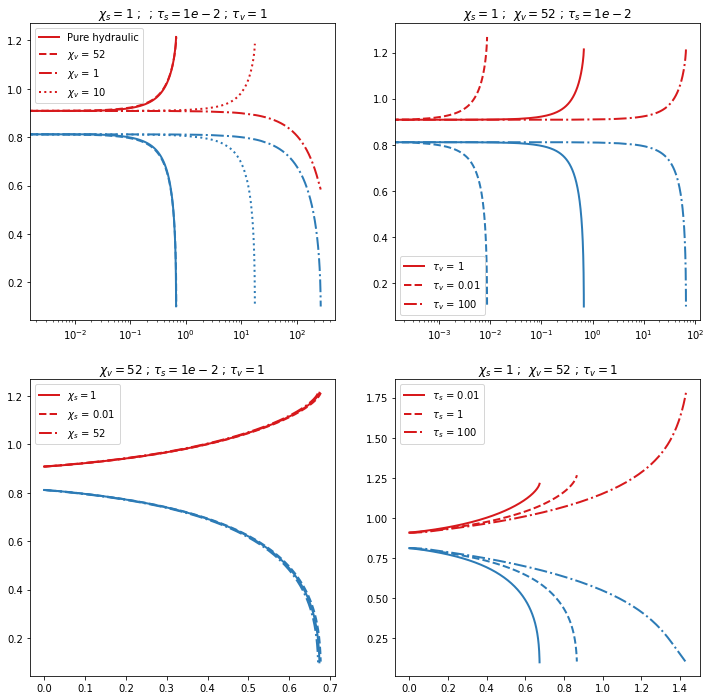

In [3]:

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

lw = 2

ax[0, 0].set_xscale('log')
ax[0, 1].set_xscale('log')
#ax[1, 0].set_xscale('log')
#ax[1, 1].set_xscale('log')

# Changing chi_v
ax[0, 0].plot(hydraulic[:, 0], hydraulic[:, 1], color = '#d7191c', label = 'Pure hydraulic', linewidth=lw)
ax[0, 0].plot(hydraulic[:, 0], hydraulic[:, 2], color='#2c7bb6', linewidth=lw)

ax[0, 0].plot(HO1[:, 0], HO1[:, 1], linestyle = '--', color = '#d7191c', label = r'$\chi_v$ = 52', linewidth=lw)
ax[0, 0].plot(HO1[:, 0], HO1[:, 2], linestyle = '--', color='#2c7bb6', linewidth=lw)

ax[0, 0].plot(HO2[:, 0], HO2[:, 1], linestyle = '-.', color = '#d7191c', label = r'$\chi_v$ = 1', linewidth=lw)
ax[0, 0].plot(HO2[:, 0], HO2[:, 2], linestyle = '-.', color='#2c7bb6', linewidth=lw)

ax[0, 0].plot(HO3[:, 0], HO3[:, 1], linestyle = 'dotted', color = '#d7191c', label = r'$\chi_v$ = 10', linewidth=lw)
ax[0, 0].plot(HO3[:, 0], HO3[:, 2], linestyle = 'dotted', color='#2c7bb6', linewidth=lw)

ax[0, 0].set_title(r'$\chi_s=1$ ; ' + r' ; $\tau_s=1e-2$ '+r'; $\tau_v=1$')
ax[0, 0].legend()

# Changing tauv
ax[0, 1].plot(HO1[:, 0], HO1[:, 1], color = '#d7191c', label = r'$\tau_v$ = 1', linewidth=lw)
ax[0, 1].plot(HO1[:, 0], HO1[:, 2], color='#2c7bb6', linewidth=lw)

ax[0, 1].plot(HO8[:, 0], HO8[:, 1], linestyle = '--', color = '#d7191c', label = r'$\tau_v$ = 0.01', linewidth=lw)
ax[0, 1].plot(HO8[:, 0], HO8[:, 2], linestyle = '--', color='#2c7bb6', linewidth=lw)

ax[0, 1].plot(HO9[:, 0], HO9[:, 1], linestyle = '-.', color = '#d7191c', label = r'$\tau_v$ = 100', linewidth=lw)
ax[0, 1].plot(HO9[:, 0], HO9[:, 2], linestyle = '-.', color='#2c7bb6', linewidth=lw)

ax[0, 1].set_title(r'$\chi_s=1$ ; ' + r' $\chi_v=52$ '+r'; $\tau_s=1e-2$')
ax[0, 1].legend()

# Changing chi_s
ax[1, 0].plot(HO1[:, 0], HO1[:, 1], color = '#d7191c', label = r'$\chi_s=1$', linewidth=lw)
ax[1, 0].plot(HO1[:, 0], HO1[:, 2], color='#2c7bb6', linewidth=lw)

ax[1, 0].plot(HO6[:, 0], HO6[:, 1], linestyle = '--', color = '#d7191c', label = r'$\chi_s$ = 0.01', linewidth=lw)
ax[1, 0].plot(HO6[:, 0], HO6[:, 2], linestyle = '--', color='#2c7bb6', linewidth=lw)

ax[1, 0].plot(HO7[:, 0], HO7[:, 1], linestyle = '-.', color = '#d7191c', label = r'$\chi_s$ = 52', linewidth=lw)
ax[1, 0].plot(HO7[:, 0], HO7[:, 2], linestyle = '-.', color='#2c7bb6', linewidth=lw)

ax[1, 0].set_title(r'$\chi_v=52$ ; ' + r'$\tau_s=1e-2$ '+r'; $\tau_v=1$')
ax[1, 0].legend()

# Changing taus
ax[1, 1].plot(HO1[:, 0], HO1[:, 1], color = '#d7191c', label = r'$\tau_s$ = 0.01', linewidth=lw)
ax[1, 1].plot(HO1[:, 0], HO1[:, 2], color='#2c7bb6', linewidth=lw)

ax[1, 1].plot(HO4[:, 0], HO4[:, 1], linestyle = '--', color = '#d7191c', label = r'$\tau_s$ = 1', linewidth=lw)
ax[1, 1].plot(HO4[:, 0], HO4[:, 2], linestyle = '--', color='#2c7bb6', linewidth=lw)

ax[1, 1].plot(HO5[:, 0], HO5[:, 1], linestyle = '-.', color = '#d7191c', label = r'$\tau_s$ = 100', linewidth=lw)
ax[1, 1].plot(HO5[:, 0], HO5[:, 2], linestyle = '-.', color='#2c7bb6', linewidth=lw)

ax[1, 1].set_title(r'$\chi_s=1$ ; ' + r' $\chi_v=52$ '+r'; $\tau_v=1$')
ax[1, 1].legend()

plt.show()

In [23]:
d = {}
# tau_v = 1
# d[taus][chiv][chis]
taus = 100
d[taus] = {}


for chiv in [1, 10, 100] :
    d[taus][chiv] = {}
    for chis in [0.01, 1, 100] :
        path = os.path.join(main_dir, 'taus'+str(taus)+'_chiv'+str(chiv)+'_chis'+str(chis), 'distrib_length.dat')
        d[taus][chiv][chis] = np.genfromtxt(path, skip_footer=2)
    
taus, chiv, chis = 1, 10, 1
d[taus] = {}
d[taus][chiv] = {}
path = os.path.join(main_dir, 'taus'+str(taus)+'_chiv'+str(chiv)+'_chis'+str(chis), 'distrib_length.dat')
d[taus][chiv][chis] = np.genfromtxt(path, skip_footer=2)

In [24]:
ls = {0.01 : '-', 1 : 'dotted', 100 : '--'}

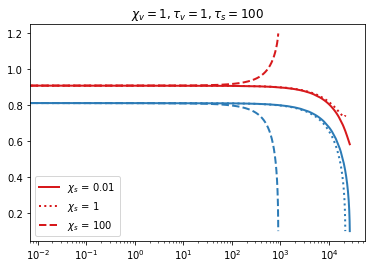

In [25]:
tauv = 1
taus = 100
chiv = 1

for chis in [0.01, 1, 100] :
    dat = d[taus][chiv][chis]
    plt.plot(dat[:, 0], dat[:, 1], linestyle = ls[chis], color = '#d7191c', label = r'$\chi_s$ = '+str(chis), linewidth=lw)
    plt.plot(dat[:, 0], dat[:, 2], linestyle = ls[chis], color='#2c7bb6', linewidth=lw)

plt.xscale('log')

plt.title(r'$\chi_v = '+str(chiv)+r', \tau_v='+str(tauv)+r', \tau_s='+str(taus)+'$')
plt.legend()
plt.show()

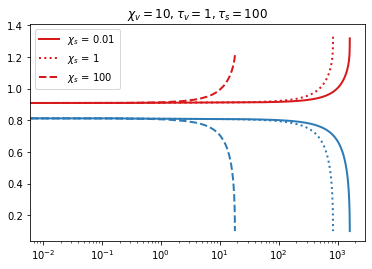

In [51]:
tauv = 1
taus = 100
chiv = 10

for chis in [0.01, 1, 100] :
    dat = d[taus][chiv][chis]
    plt.plot(dat[:, 0], dat[:, 1], linestyle = ls[chis], color = '#d7191c', label = r'$\chi_s$ = '+str(chis), linewidth=lw)
    plt.plot(dat[:, 0], dat[:, 2], linestyle = ls[chis], color='#2c7bb6', linewidth=lw)

plt.xscale('log')

plt.title(r'$\chi_v = '+str(chiv)+r', \tau_v='+str(tauv)+r', \tau_s='+str(taus)+'$')
plt.legend()
plt.show()

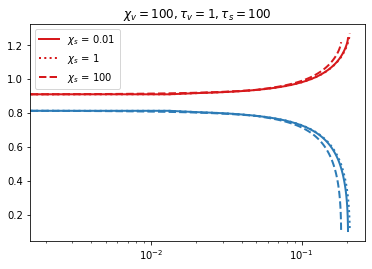

In [27]:
tauv = 1
taus = 100
chiv = 100

for chis in [0.01, 1, 100] :
    dat = d[taus][chiv][chis]
    plt.plot(dat[:, 0], dat[:, 1], linestyle = ls[chis], color = '#d7191c', label = r'$\chi_s$ = '+str(chis), linewidth=lw)
    plt.plot(dat[:, 0], dat[:, 2], linestyle = ls[chis], color='#2c7bb6', linewidth=lw)

plt.xscale('log')

plt.title(r'$\chi_v = '+str(chiv)+r', \tau_v='+str(tauv)+r', \tau_s='+str(taus)+'$')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


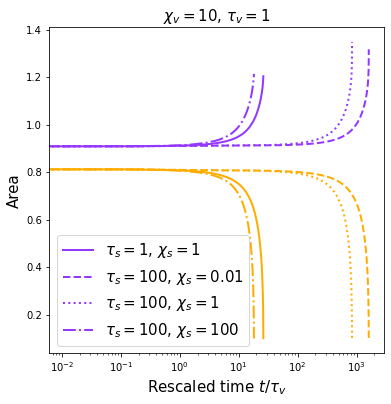

In [52]:
tauv = 1
chiv = 10

plt.figure(figsize=(6, 6))
plt.xscale('log')

chis, taus = 1, 1
plt.plot(d[taus][chiv][chis][:, 0], d[taus][chiv][chis][:, 1], linestyle='-', color='#9437FF', linewidth=2, label = r'$\tau_s='+str(taus)+'$' + r', $\chi_s = '+str(chis) + '$')
plt.plot(d[taus][chiv][chis][:, 0], d[taus][chiv][chis][:, 2], linestyle='-', color='#FFAC00', linewidth=2, )

chis, taus = 0.01, 100
plt.plot(d[taus][chiv][chis][:, 0], d[taus][chiv][chis][:, 1], linestyle='--', color='#9437FF', linewidth=2, label = r'$\tau_s='+str(taus)+'$' + r', $\chi_s = '+str(chis) + '$')
plt.plot(d[taus][chiv][chis][:, 0], d[taus][chiv][chis][:, 2], linestyle='--', color='#FFAC00', linewidth=2, )

chis, taus = 1, 100
plt.plot(d[taus][chiv][chis][:, 0], d[taus][chiv][chis][:, 1], linestyle='dotted', color='#9437FF', linewidth=2, label = r'$\tau_s='+str(taus)+'$' + r', $\chi_s = '+str(chis) + '$')
plt.plot(d[taus][chiv][chis][:, 0], d[taus][chiv][chis][:, 2], linestyle='dotted', color='#FFAC00', linewidth=2, )

chis, taus = 100, 100
plt.plot(d[taus][chiv][chis][:, 0], d[taus][chiv][chis][:, 1], linestyle='-.', color='#9437FF', linewidth=2, label = r'$\tau_s='+str(taus)+'$' + r', $\chi_s = '+str(chis) + '$')
plt.plot(d[taus][chiv][chis][:, 0], d[taus][chiv][chis][:, 2], linestyle='-.', color='#FFAC00', linewidth=2, )

plt.title(r'$\chi_v=10$, $\tau_v=1$', fontsize=15)
plt.legend(fontsize=15)
plt.xlabel(r'Rescaled time $t/\tau_v$', fontsize=15)
plt.ylabel('Area', fontsize=15)
plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/trapped_ions_example.eps', format='eps')

plt.show()


# Trajectory

In [7]:
def fmu(theta=np.pi/3.) :
    return np.sin(theta)**2 / (2*theta-np.sin(2*theta))

def Delta_C(L1, L2, N1, N2) :
    mu = fmu()
    C1 = mu*N1/L1**2
    C2 = mu*N2/L2**2
    return (C2-C1)/(C1+C2)

def Delta_P(L1, L2) :
    eps = 1e-3
    P1 = eps/L1
    P2 = eps/L2
    return (P2-P1)/(P1+P2)

def Deltas(folder) :
    L1, L2 = np.genfromtxt(os.path.join(main_dir, folder, 'distrib_length.dat'), skip_footer=2, unpack=True, usecols=(1, 2))
    N1, N2 = np.genfromtxt(os.path.join(main_dir, folder, 'distrib_nion.dat'), skip_footer=2, unpack=True, usecols=(1, 2))
    DC = Delta_C(L1, L2, N1, N2)
    DP = Delta_P(L1, L2)
    return DC, DP

In [8]:
Delta_C_HO1, Delta_P_HO1 = Deltas('HO1')
Delta_C_HO2, Delta_P_HO2 = Deltas('HO2')
Delta_C_HO3, Delta_P_HO3 = Deltas('HO3')
Delta_C_HO4, Delta_P_HO4 = Deltas('HO4')
Delta_C_HO5, Delta_P_HO5 = Deltas('HO5')
Delta_C_HO6, Delta_P_HO6 = Deltas('HO6')
Delta_C_HO7, Delta_P_HO7 = Deltas('HO7')
Delta_C_HO8, Delta_P_HO8 = Deltas('HO8')
Delta_C_HO9, Delta_P_HO9 = Deltas('HO9')


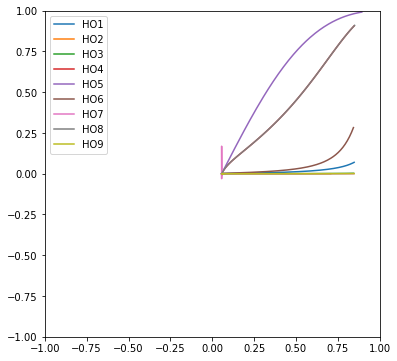

In [9]:
plt.figure(figsize=(6, 6))

plt.xlim(-1., 1.)
plt.ylim(-1., 1.)

plt.plot(Delta_P_HO1, Delta_C_HO1, label = 'HO1')
plt.plot(Delta_P_HO2, Delta_C_HO2, label = 'HO2')
plt.plot(Delta_P_HO3, Delta_C_HO3, label = 'HO3')
plt.plot(Delta_P_HO4, Delta_C_HO4, label = 'HO4')
plt.plot(Delta_P_HO5, Delta_C_HO5, label = 'HO5')
plt.plot(Delta_P_HO6, Delta_C_HO6, label = 'HO6')
plt.plot(Delta_P_HO7, Delta_C_HO7, label = 'HO7')
plt.plot(Delta_P_HO8, Delta_C_HO8, label = 'HO8')
plt.plot(Delta_P_HO9, Delta_C_HO9, label = 'HO9')

plt.legend()